* **Part1: Exploratory Data Analysis(EDA):**
    * Analysis of the features.
    * Finding any felations or trends considering multiple features.
* **Part2: Feature Engineering and Data Cleaning:**
    * Adding any few features.
    * Removing redundant features.
    * Converting features into suitable form for modeling.
* **Part3: Predictive Modeling:**
    * Running Basic Algorithms.
    * Cross Validation.
    * Ensembling.
    * Important Features Extraction.

## Part1: Exploratory Data Analysis(EDA)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # a style of show like matplotlib
plt.style.use('fivethirtyeight') # a style of matplotlib
#import warnings
#warnings.filterwarnings('ignore') # ignore warnings
%matplotlib inline

In [24]:
data = pd.read_csv('train.csv')

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

### How many Survived?

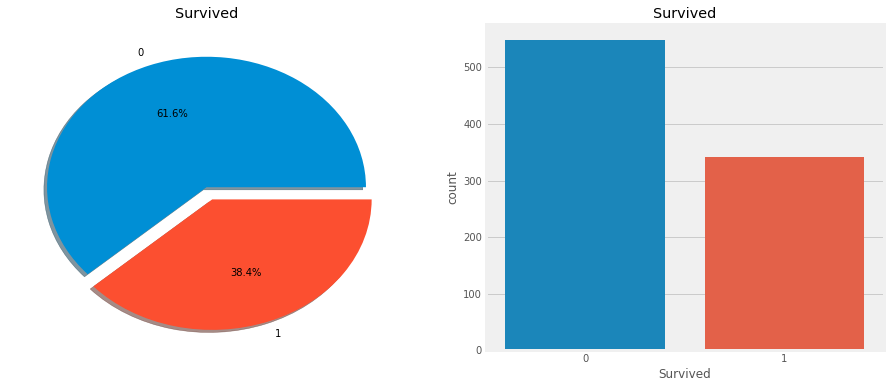

In [86]:
f, ax = plt.subplots(1, 2, figsize=(14, 6)) 
# layouts of subplots, figsize = width, height in inches. If not provided, defaults to rc figure.figsize.
# ax[0] for percent, ax[1] for counts
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash.
We need to dig down more to get better insights from the data and see which categories of the passengers did survive and
who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of
Embarcation, Age, etc.

First let us understand the different types of features.

## Types Of Features
### Categorical Features:
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories(male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables.**

**Categorical Features in the dataset: Sex, Embarked.**

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like **Height** with values **Tall, Medium, Short,** then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: Pclass**

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Coninous Features in the dataset:Age**